- https://nlp.stanford.edu/projects/glove/
- https://github.com/maciejkula/glove-python

In [38]:
def visualization(model, size=50):
    from sklearn.decomposition.pca import PCA
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # 支持中文
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    
    vocab = model.word_vectors[:size]
    X = vocab
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.scatter(result[:, 0], result[:, 1])
        
    idx2word = {i:x for x,i in model.dictionary.items()}
    for i, word in enumerate(vocab):
        plt.annotate(idx2word.get(i,'UNK'), xy=(result[i, 0], result[i, 1]))
    plt.show()

### 1.Use word2vec to load glove embeddings

In [ ]:
import gensim
from gensim.scripts.glove2word2vec import glove2word2vec

glove_file = '../../../词向量Embedding/glove.6B/glove.6B.100d.txt'
word2vec_file = 'word2vec_embedding.txt'
count, dimensions = glove2word2vec(glove_file, word2vec_file)
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_file)
print(count, dimensions)

### 2. Use glove-python load glove embeddings

In [9]:
from glove import Corpus, Glove
sentences = ["Human machine interface for lab abc computer applications",
            "A survey of user opinion of computer system response time",
            "The EPS user interface management system",
            "System and human system engineering testing of EPS",
            "Relation of user perceived response time to error measurement",
            "The generation of random binary unordered trees",
            "The intersection graph of paths in trees",
            "Graph minors IV Widths of trees and well quasi ordering",
            "Graph minors A survey"]

sentences= [s.split() for s in sentences]

corpus = Corpus()
corpus.fit(sentences, window=10)

model = Glove(no_components=100, learning_rate=0.05)
model.fit(corpus.matrix, epochs=30, no_threads=4, verbose=True)
model.add_dictionary(corpus.dictionary)

Performing 30 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29


In [13]:
model.most_similar('machine',number=10)

[('interface', 0.39430042742115695),
 ('user', 0.1617742035655887),
 ('opinion', 0.13556067971562907),
 ('Graph', 0.12990375485123454),
 ('survey', 0.11098054741396074),
 ('System', 0.09537976710507416),
 ('binary', 0.08812961786481666),
 ('IV', 0.07910903597565257),
 ('management', 0.07483301495509694)]

In [22]:
model.dictionary

{'Human': 0,
 'machine': 1,
 'interface': 2,
 'for': 3,
 'lab': 4,
 'abc': 5,
 'computer': 6,
 'applications': 7,
 'A': 8,
 'survey': 9,
 'of': 10,
 'user': 11,
 'opinion': 12,
 'system': 13,
 'response': 14,
 'time': 15,
 'The': 16,
 'EPS': 17,
 'management': 18,
 'System': 19,
 'and': 20,
 'human': 21,
 'engineering': 22,
 'testing': 23,
 'Relation': 24,
 'perceived': 25,
 'to': 26,
 'error': 27,
 'measurement': 28,
 'generation': 29,
 'random': 30,
 'binary': 31,
 'unordered': 32,
 'trees': 33,
 'intersection': 34,
 'graph': 35,
 'paths': 36,
 'in': 37,
 'Graph': 38,
 'minors': 39,
 'IV': 40,
 'Widths': 41,
 'well': 42,
 'quasi': 43,
 'ordering': 44}

In [23]:
model.word_vectors.shape

(45, 100)

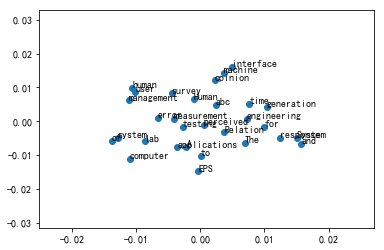

In [41]:
visualization(model,size=30)